# Importing Libraries

In [445]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [446]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from keras.layers import Input
from keras.layers import LeakyReLU

In [447]:
sns.set_style('whitegrid')

In [448]:
df = pd.read_csv('train.csv')

In [449]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [450]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [451]:
def get_percentage_of_missing_values(dataframe):
    col_list = dataframe.columns
    my_dict = {}
    total_null = 0
    for i in range(len(col_list)):
        total_null += dataframe[col_list[i]].isnull().sum()
    if(total_null == 0):
        return "No Missing Values Found"
    for i in range(len(col_list)):
        curr_null = dataframe[col_list[i]].isnull().sum()
        my_dict[col_list[i]] = (curr_null/total_null) * 100
    for i,(k,v) in enumerate(my_dict.items()):
        if(v > 0):
            print("Missing % value in {col_name} is : {val:.2f} ".format(col_name=k,val=v))
    plt.figure(figsize=(12,10))
    sns.barplot(x = list(my_dict.keys()),y = list(my_dict.values()),hue = list(my_dict.keys()))

Missing % value in Age is : 20.44 
Missing % value in Cabin is : 79.33 
Missing % value in Embarked is : 0.23 


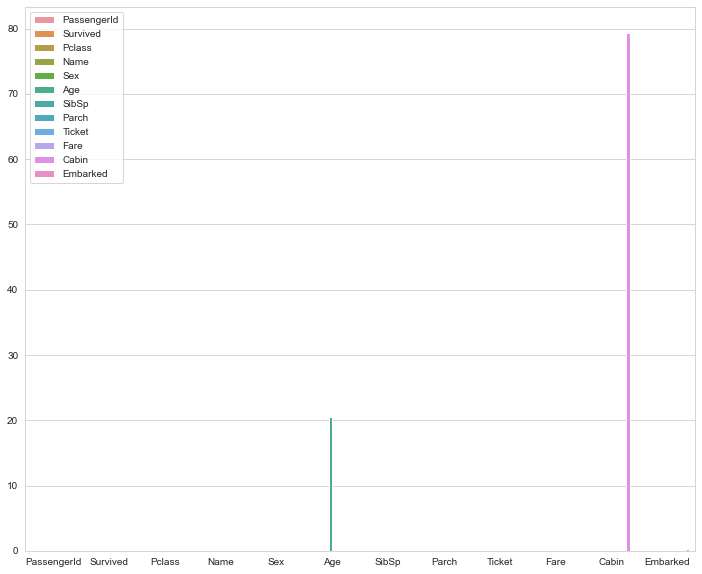

In [452]:
get_percentage_of_missing_values(df)

Total Columns : 12
Total Numerical Columns : 7
Total Categorical Columns : 5


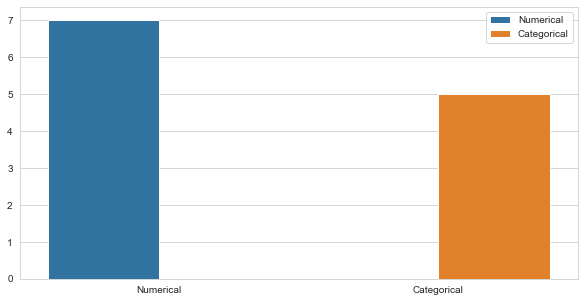

In [453]:
# Get Columns representation
num_cols = df._get_numeric_data().columns
cat_cols = set(df.columns)-set(num_cols)
category_list = ['Numerical','Categorical']
count_col_list = [len(num_cols),len(cat_cols)]
def get_col_type_representation(cat_list,count_list):
    plt.figure(figsize=(10,5))
    print("Total Columns : {total}".format(total=len(df.columns)))
    print("Total Numerical Columns : {numerical}".format(numerical=len(num_cols)))
    print("Total Categorical Columns : {categorical}".format(categorical=len(cat_cols)))
    sns.barplot(x=cat_list,y=count_list,hue = cat_list)
get_col_type_representation(category_list,count_col_list)

<AxesSubplot:>

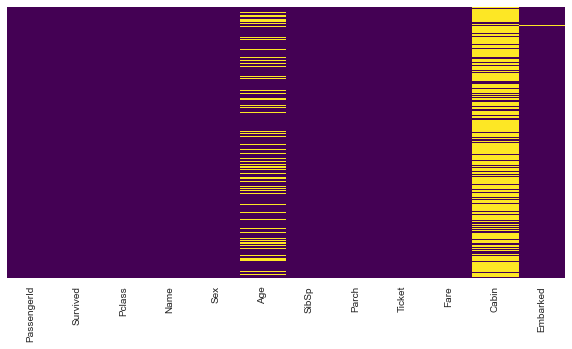

In [454]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

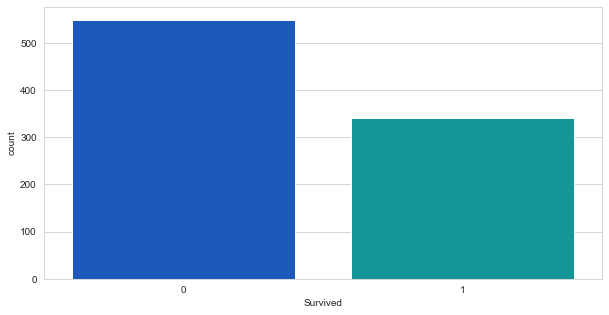

In [455]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Survived',palette = 'winter')

In [456]:
pd.crosstab([df['Sex']],df['Survived'],margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


<AxesSubplot:xlabel='Survived', ylabel='count'>

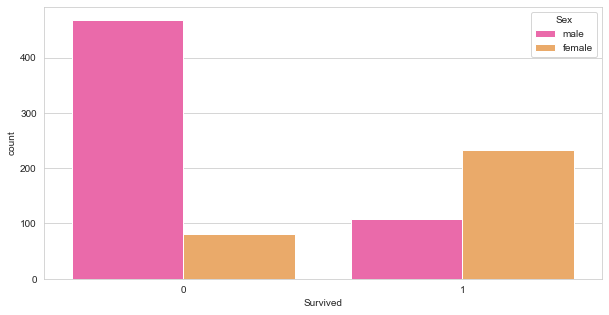

In [457]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Survived',hue='Sex',palette = 'spring')

In [458]:
pd.crosstab([df['Sex'],df['Survived']],df['Pclass'],margins=True).style.background_gradient(cmap='cool')

<AxesSubplot:xlabel='Survived', ylabel='count'>

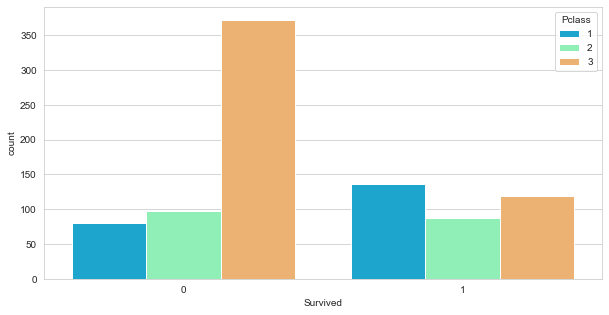

In [459]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Survived',hue='Pclass',palette='rainbow')

<Figure size 1080x720 with 0 Axes>

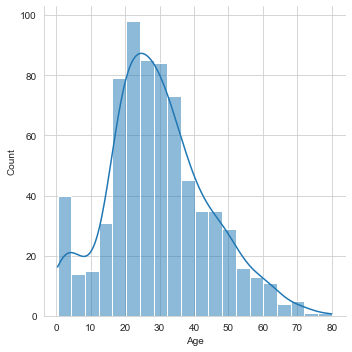

In [460]:
plt.figure(figsize=(15,10))
sns.displot(data=df['Age'].dropna(),kde=True)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

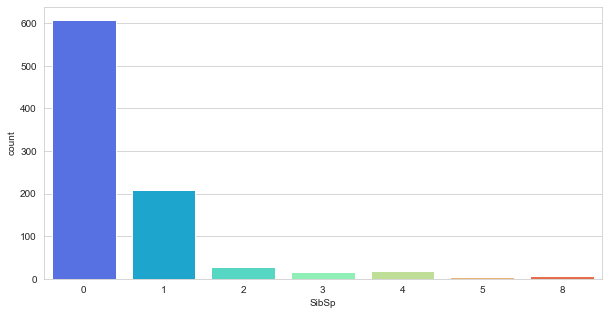

In [461]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='SibSp',palette='rainbow')

In [462]:
pd.crosstab([df['SibSp']],df['Pclass'],margins=True).style.background_gradient(cmap='Pastel1')

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


In [463]:
pd.crosstab([df['Survived']],df['SibSp'],margins=True).style.background_gradient(cmap='rainbow')

SibSp,0,1,2,3,4,5,8,All
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
All,608,209,28,16,18,5,7,891


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

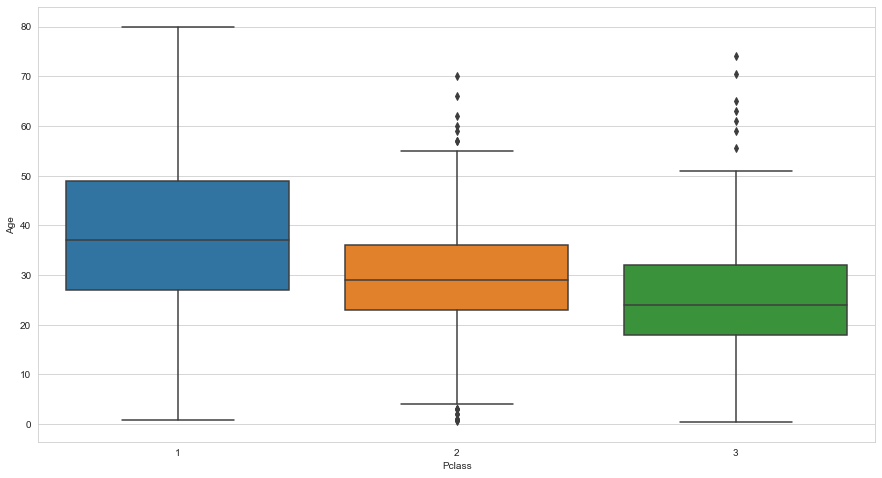

In [464]:
plt.figure(figsize=(15,8))
sns.boxplot(data = df,x=df['Pclass'],y=df['Age'])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

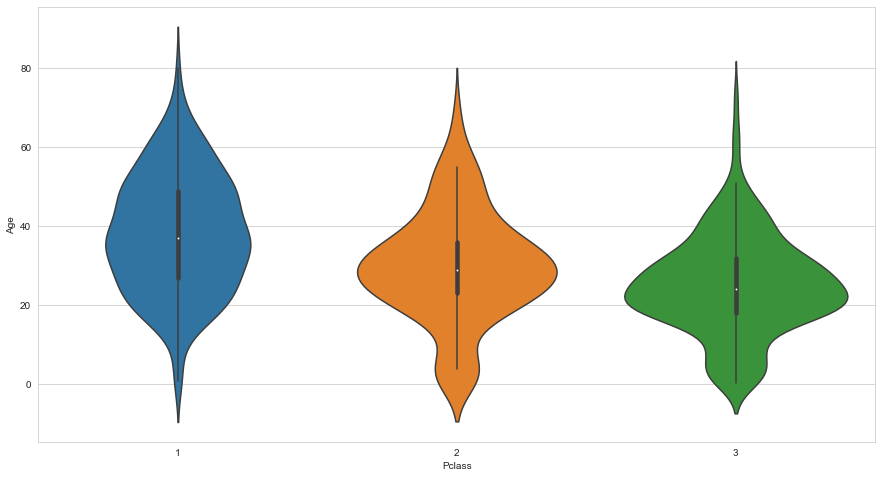

In [465]:
plt.figure(figsize=(15,8))
sns.violinplot(data = df,x=df['Pclass'],y=df['Age'])

# Data Cleaning and Preparation 

In [501]:
print(df[df['Pclass']==1]['Age'].median())
print(df[df['Pclass']==2]['Age'].median())
print(df[df['Pclass']==3]['Age'].median())

37.0
29.0
25.0


In [466]:
# Here we are filling the missing value of the age column. If the Age value is null and if the person belongs to the P-class 1
# then we are filling it with 37 and similarly for other P-class.
# 37 is the average age of people travelling on the P-class 1
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 25
    else:
        return Age

<AxesSubplot:>

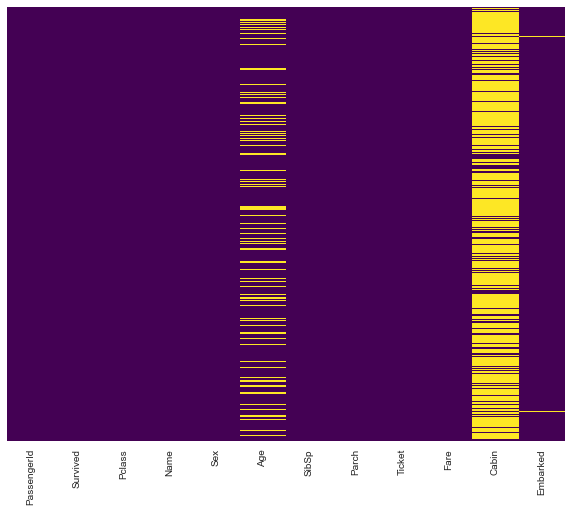

In [467]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [468]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

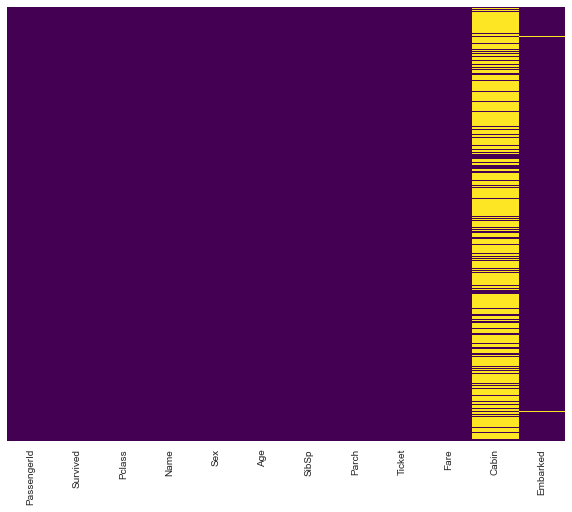

In [469]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [470]:
# Dropping cabin column due to large number of null values
df.drop(['Cabin'],axis=1,inplace=True)

<AxesSubplot:>

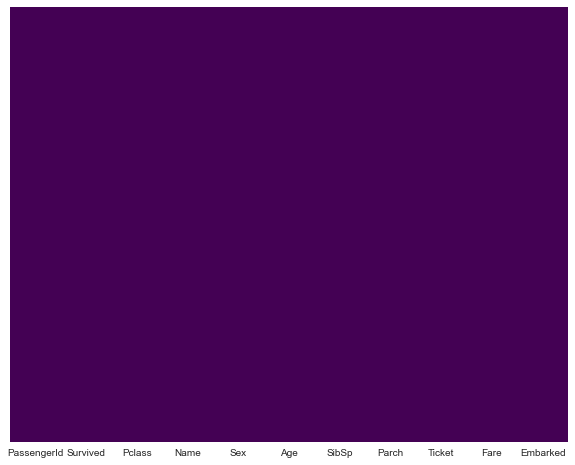

In [471]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [472]:
# One hot encoding the data
df_filtered_ohe = pd.get_dummies(df, columns=['Pclass','Sex','Embarked'],drop_first=True)

In [473]:
df_filtered_ohe.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,1,0,1


In [474]:
# Dropping some of the feature columns 
df_filtered_ohe.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [475]:
df_filtered_ohe.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [476]:
df_filtered_ohe.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [477]:
X = df_filtered_ohe.iloc[:,1:].values
X

array([[22.,  1.,  0., ...,  1.,  0.,  1.],
       [38.,  1.,  0., ...,  0.,  0.,  0.],
       [26.,  0.,  0., ...,  0.,  0.,  1.],
       ...,
       [25.,  1.,  2., ...,  0.,  0.,  1.],
       [26.,  0.,  0., ...,  1.,  0.,  0.],
       [32.,  0.,  0., ...,  1.,  1.,  0.]])

In [478]:
y = df_filtered_ohe.iloc[:,0].values

In [479]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [480]:
# Standardizing the features
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

In [481]:
no_of_samples_tr = X_train.shape[0]            
input_features = X_train.shape[1]               
channels = 1
batch_size_tr = no_of_samples_tr                

In [482]:
no_of_samples_test = X_test.shape[0]           
input_features = X_test.shape[1]               
channels = 1
batch_size_test = no_of_samples_test           

In [483]:
# Reshaping input train/test data as required by Keras for conv1D:
train = X_train.reshape((no_of_samples_tr  , input_features, channels))
test  = X_test.reshape(( no_of_samples_test, input_features, channels))

In [484]:
print(train.shape)
print(test.shape)

(623, 9, 1)
(268, 9, 1)


In [485]:
# Inputs to model
inputs = Input(shape = (train.shape[1],train.shape[2]))

In [486]:
inputs

<KerasTensor: shape=(None, 9, 1) dtype=float32 (created by layer 'input_9')>

# Model Building 

In [487]:
# Adding convolution layers to left arm
x_left = layers.Conv1D(filters = 32,kernel_size=3,activation=LeakyReLU(alpha=0.1))(inputs)

x_left = layers.Conv1D(filters = 64,kernel_size=3,activation=LeakyReLU(alpha=0.1))(x_left)

In [488]:
# Adding convolution layers to right arm
x_rt = layers.Conv1D( filters = 64,kernel_size=3,activation=LeakyReLU(alpha=0.1))(inputs)

x_rt = layers.Conv1D(filters = 128,kernel_size=3,activation=LeakyReLU(alpha=0.1))(x_rt)

In [489]:
# Concatening the layers
x = tf.keras.layers.concatenate([x_left,x_rt])

In [490]:
# Flattening the layers
xn = layers.Flatten()(x)

In [491]:
# the hidden layers
xn = layers.Dense(64, activation = LeakyReLU(alpha=0.1))(xn)
xn = layers.Dense(128, activation = LeakyReLU(alpha=0.1))(xn)

In [492]:
# the final/output layer
out = layers.Dense(1,activation = 'sigmoid')(xn)

In [493]:
# creating model with final input and output
model = Model(inputs = [inputs], outputs = [out])

In [494]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 9, 1)]       0           []                               
                                                                                                  
 conv1d_31 (Conv1D)             (None, 7, 32)        128         ['input_9[0][0]']                
                                                                                                  
 conv1d_33 (Conv1D)             (None, 7, 64)        256         ['input_9[0][0]']                
                                                                                                  
 conv1d_32 (Conv1D)             (None, 5, 64)        6208        ['conv1d_31[0][0]']              
                                                                                            

In [495]:
# model compilation
model.compile(optimizer = 'adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics = ['accuracy'])

In [496]:
# fitting the model
history = model.fit(train,y_train,epochs = 30,validation_data = (test,y_test),batch_size = 32)

Epoch 1/30
20/20 [==============================] - 1s 22ms/step - loss: 0.5611 - accuracy: 0.7416 - val_loss: 0.4433 - val_accuracy: 0.7948
Epoch 2/30
20/20 [==============================] - 0s 8ms/step - loss: 0.4290 - accuracy: 0.8154 - val_loss: 0.4470 - val_accuracy: 0.8060
Epoch 3/30
20/20 [==============================] - 0s 7ms/step - loss: 0.4176 - accuracy: 0.8331 - val_loss: 0.4502 - val_accuracy: 0.7948
Epoch 4/30
20/20 [==============================] - 0s 6ms/step - loss: 0.4144 - accuracy: 0.8266 - val_loss: 0.4336 - val_accuracy: 0.8060
Epoch 5/30
20/20 [==============================] - 0s 6ms/step - loss: 0.4029 - accuracy: 0.8299 - val_loss: 0.4281 - val_accuracy: 0.8134
Epoch 6/30
20/20 [==============================] - 0s 8ms/step - loss: 0.3954 - accuracy: 0.8395 - val_loss: 0.4284 - val_accuracy: 0.8097
Epoch 7/30
20/20 [==============================] - 0s 6ms/step - loss: 0.3911 - accuracy: 0.8427 - val_loss: 0.4327 - val_accuracy: 0.8134
Epoch 8/30
20/20 [=

# Evaluating the model

In [497]:
train_loss, train_acc = model.evaluate(train, y_train, batch_size=32)
test_loss, test_acc  = model.evaluate(test, y_test, batch_size=32)

9/9 [==============================] - 0s 3ms/step - loss: 0.4579 - accuracy: 0.8172


In [498]:
print('Train Loss = ',train_loss,'\nTrain Accuracy = ',train_acc * 100)
print('******************************')
print('Test Loss = ',test_loss,'\nTest Accuracy = ',test_acc * 100)

Train Loss =  0.3298637568950653 
Train Accuracy =  86.19582653045654
******************************
Test Loss =  0.45785969495773315 
Test Accuracy =  81.71641826629639


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


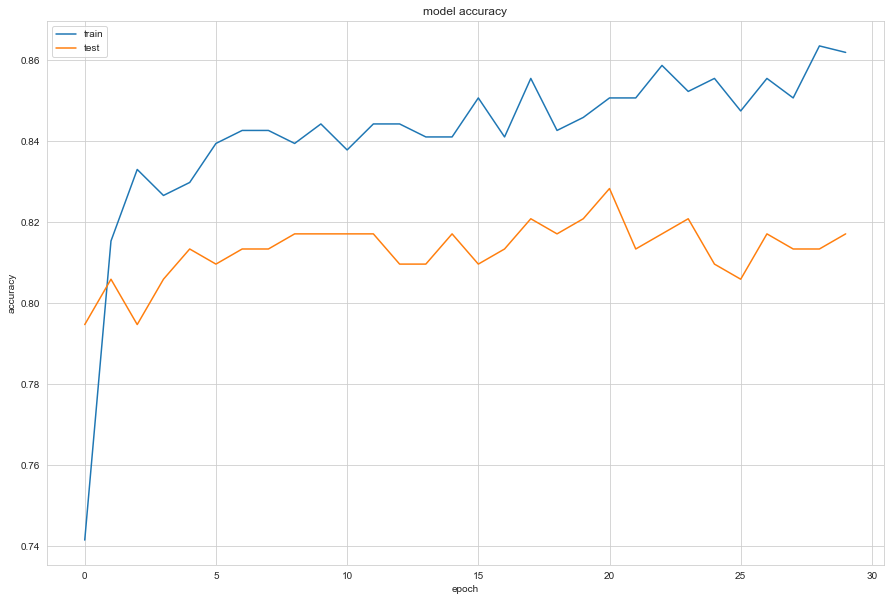

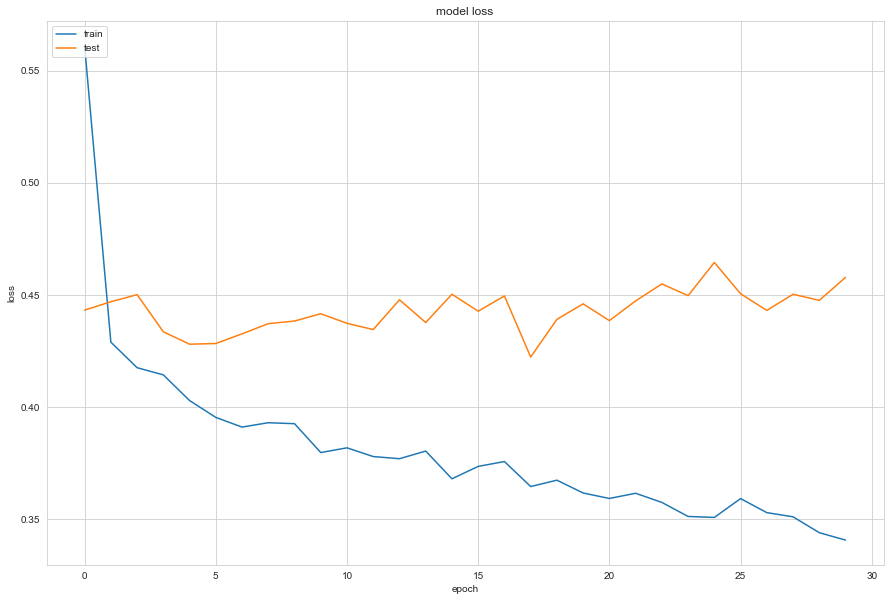

In [499]:
# list all data in history
plt.figure(figsize=(15,10))
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()